# Week 4 Programming Assignment 

Remark: 

Please upload your solutions of this assignment to Canvas with a file named "Programming_Assignment_4 _yourname.ipynb" before 11:59pm June 14.

### Problem 1 (5 pts): Given a image $x$, use Pytorch to apply the following three operations to the image sequentially:

### (1) Do a convolution  $x_{conv1}= self.conv1(x)$ with $stride=1$,  zero $padding=2$ and  the $kernel_1$:
### $$
Kernel_1=\begin{bmatrix} 
0 & 0 & -1 & 0 & 0 \\                 
0&-1&-2&-1& 0\\
-1&-2&16&-2&-1\\
0&-1&-2&-1& 0\\
0& 0&-1& 0& 0 
\end{bmatrix}
$$

### (2) Do a ReLu $x_{relu} = F.relu(x_{conv1})$

### (3) Do another convolution  $x_{conv2}= self.conv2(x_{relu})$  with $stride=1$,  zero $padding=1$ and the average $kernel_2$:
### $$
Kernel_2=\begin{bmatrix} 
\frac{1}{9} & \frac{1}{9} &\frac{1}{9}  \\                 
\frac{1}{9} & \frac{1}{9} &\frac{1}{9}  \\                 
\frac{1}{9} & \frac{1}{9} &\frac{1}{9}  
\end{bmatrix}
$$
### Define a model which includes:  a convolutional layer self.conv1(), ReLu and another convolutional layer self.conv2(). Plot four images which are $x,~x_{conv1},~x_{relu},~x_{conv2}.$


Original image


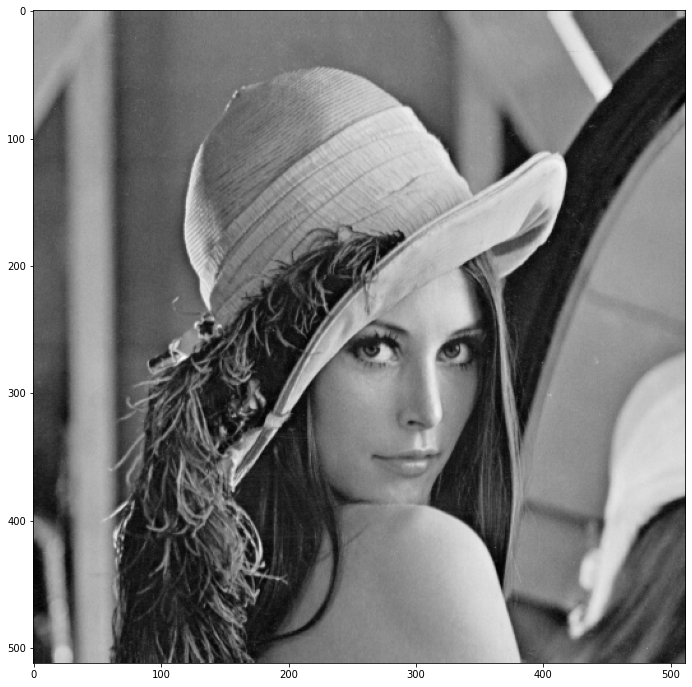

Apply the first convolution


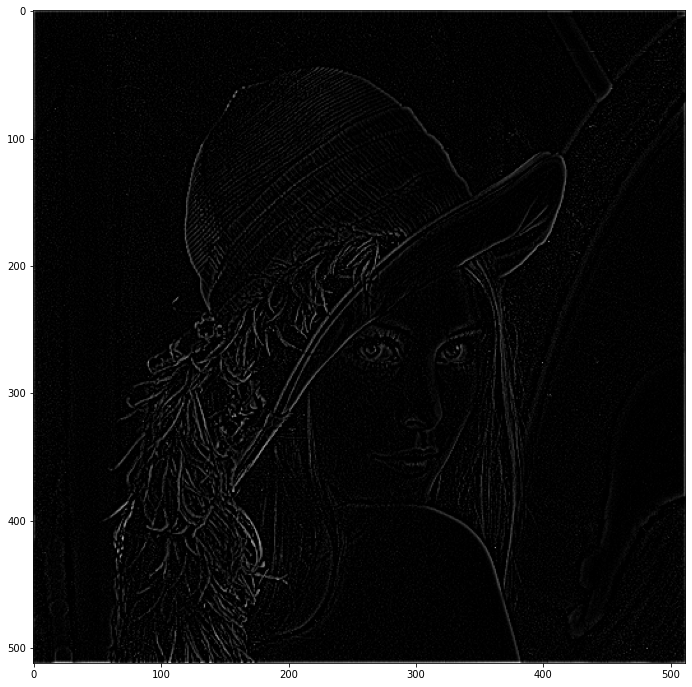

Apply the first convolution and ReLU


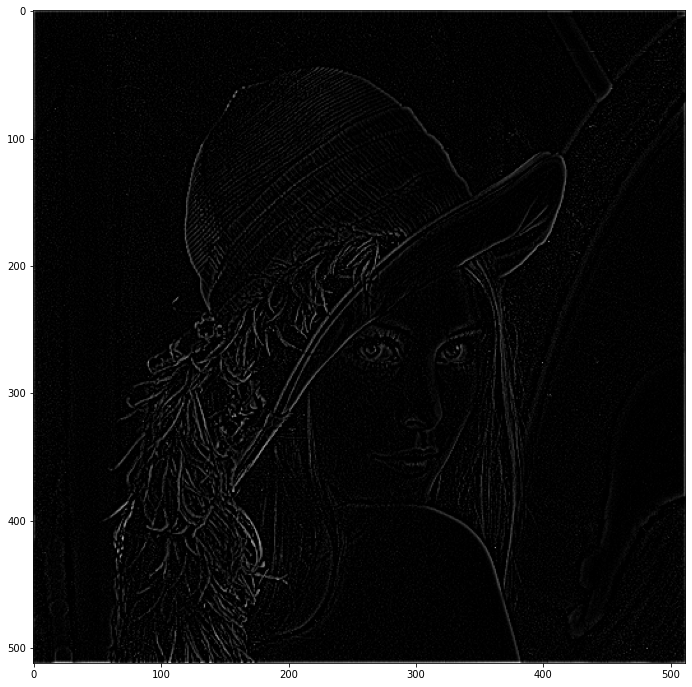

Apply the first convolution, ReLU and the second convolution


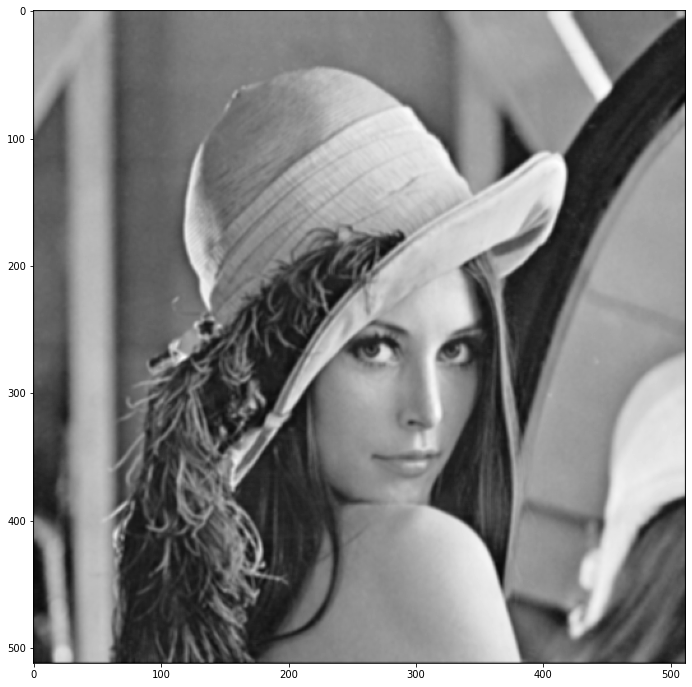

In [3]:
# This file can be run on normal jupyter notebook to check the output

# You can finish the following code to solve Problem 1.
from PIL import Image
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

#Step I: Deal with the data
def read_image():    
    im = Image.open('./lena.png')
    im_array = np.array(im)
    # transfer im_array to 4th order torch.tensor 
    im_array=torch.from_numpy(im_array)
    im_array=im_array.reshape(1,1,im_array.size(0),im_array.size(1))
    im_array=im_array.type(torch.FloatTensor)
    return im_array

#Step II: Define a function to plot the image: give 4th order torch.tensor 
def plot_images(images):
    plt.rcParams["figure.figsize"]=12,12 # change the figure size for plotting
    images_for_plot = images[0,0,:,:] 
    plt.imshow(images_for_plot.detach().numpy(), cmap='gray') 
    plt.show()
    

#Step III: Define the operators
    
class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()

        # Define the first convolutional layer
        kernel_1 = torch.tensor([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]],dtype=torch.float32)
        # reshape your 2nd order tensor to 4th order tensor. Think about why?
        kernel_1 = kernel_1.reshape(1,1,kernel_1.size(0),kernel_1.size(1)) 
        self.conv1 = nn.Conv2d(1, 1, kernel_1.size(2), stride=1, padding=2)
        # assign kerner_1 to conv1 layer.
        self.conv1.weight = torch.nn.Parameter(kernel_1)
        
        
        # Define the second convolutional layer
        kernel_2 = torch.tensor([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]],dtype=torch.float32)
        # reshape your 2nd order tensor to 4th order tensor. Think about why?
        kernel_2 = kernel_2.reshape(1,1,kernel_2.size(0),kernel_2.size(1)) 
        self.conv2 = nn.Conv2d(1, 1, kernel_2.size(2), stride=1, padding=1)
        # assign kerner_2 to conv2 layer.
        self.conv2.weight = torch.nn.Parameter(kernel_2)
            
    def forward(self, x):
        x_conv1 = F.relu(self.conv1(x))
        # The question said take relu of conv1 but I am not sure what that exactly means
        # since Relu means max, so I decided to write the code for that, but the actual code which works is below
        # x_relu = F.max_pool2d(x_conv1, 2)
        
        # Since the code above might be wrong, below is the line I would use instead of doing max
        # pooling to take the relu of conv1
        x_relu = F.relu(x_conv1)
        
        # The only difference I noticed in the above images is:
        # The Relu image with max pooling is blurry compared to just taking relu, which makes sense
        # since max pooling means the matrix is half its original (hence more blurry image)
        
        x_conv2 = F.relu(self.conv2(x))
        return x_conv1,x_relu,x_conv2
    
#Step IV: Show results:
x=read_image()
my_model=model()
x_conv1,x_relu,x_conv2 = my_model(x)

print('Original image')
plot_images(x)
print('Apply the first convolution')
plot_images(x_conv1)
print('Apply the first convolution and ReLU')
plot_images(x_relu)
print('Apply the first convolution, ReLU and the second convolution')
plot_images(x_conv2)

=================================================================================================================

### **Problem 2 (5 pts).** Try to use stochastic gradient descent method to train CIFAR10 with LeNet-5 to achieve 60% test accuracy. Apply the following two strategies:

* ### Run 30 epochs, and divide the learning rate by 10 every 10 epochs
* ### Weight decay 
* ### Data normalization



### Print the results with the following format:

   "Epoch: i, Training accuracy: $a_i$, Test accuracy: $b_i$"

where $i=1,2,3,...$ means the $i$-th epoch,  $a_i$ and $b_i$ are the training accuracy and test accuracy computed at the end of $i$-th epoch.

In [0]:
# 1) Using stochastic gradient descent method to train CIFAR-10 with LeNet-5
# to achieve at least 60 percent test accuracy

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F

# Define a LeNet-5
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.avg_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.avg_pool2d(out, 2)
        out = out.view(out.size(0), -1) 
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out
    
minibatch_size = 128
init_lr = 0.1

my_model = model()
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(my_model.parameters(), lr=init_lr, weight_decay = 0.00001)
# weight_decay is usually small. Two suggested values: 0.0001, 0.00001

CIFAR10_transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=CIFAR10_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=minibatch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=CIFAR10_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

def adjust_learning_rate(optimizer, epoch, init_lr):
    #lr = 1.0 / (epoch + 1)
    lr = init_lr * 0.1 ** (epoch // 10)  # epoch // 10, calculate the quotient 
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return lr

num_epochs = 30

for epoch in range(num_epochs):
    count_test, count_train = 0, 0
    correct_test, correct_train = 0, 0
    Accuracy_test, Accuracy_train = 0, 0
    current_lr = adjust_learning_rate(optimizer, epoch, init_lr)
    
    for i, (images, labels) in enumerate(trainloader):
        outputs = my_model(images)
        loss = criterion(outputs, labels) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    for i, (images, labels) in enumerate(trainloader):
        outputs = my_model(images)
        p_max, predicted = torch.max(outputs, 1) 
        count_train += labels.size(0)
        correct_train += (predicted == labels).sum()
        Accuracy_train = 100 * float(correct_train) / count_train
        
    for i, (images, labels) in enumerate(testloader):
        outputs = my_model(images)
        p_max, predicted = torch.max(outputs, 1) 
        count_test += labels.size(0)
        correct_test += (predicted == labels).sum()
        Accuracy_test = 100 * float(correct_test) / count_test
        
    print('Epoch: {}, Test accuracy: {}, Train accuracy: {}'.format(epoch+1, Accuracy_test, Accuracy_train))

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1, Test accuracy: 37.99, Train accuracy: 37.488
Epoch: 2, Test accuracy: 45.58, Train accuracy: 45.772
Epoch: 3, Test accuracy: 48.37, Train accuracy: 49.072
Epoch: 4, Test accuracy: 51.04, Train accuracy: 53.056
Epoch: 5, Test accuracy: 55.32, Train accuracy: 58.288
Epoch: 6, Test accuracy: 49.26, Train accuracy: 52.402
Epoch: 7, Test accuracy: 55.79, Train accuracy: 60.062
Epoch: 8, Test accuracy: 55.16, Train accuracy: 60.078
Epoch: 9, Test accuracy: 58.86, Train accuracy: 65.06
Epoch: 10, Test accuracy: 58.58, Train accuracy: 66.366
Epoch: 11, Test accuracy: 62.32, Train accuracy: 71.122
Epoch: 12, Test accuracy: 62.44, Train accuracy: 71.834
Epoch: 13, Test accuracy: 62.08, Train accuracy: 72.066
Epoch: 14, Test accuracy: 62.53, Train accuracy: 72.646
Epoch: 15, Test accuracy: 62.34, Train accuracy: 72.844
Epoch: 16, Test accuracy: 62.5, Train accuracy: 73.286
Epoch: 17, Test accuracy: 62.27, Train 

=================================================================================================================

### **Optional Problem 1.** Try to use stochastic gradient descent method to train MNIST with LeNet-5 to achieve 99% test accuracy. Apply the following two strategies:

* ### Run 20 epochs, and divide the learning rate by 10 every 10 epochs
* ### Weight decay 

### Print the results with the following format:

   "Epoch: i, Training accuracy: $a_i$, Test accuracy: $b_i$"

where $i=1,2,3,...$ means the $i$-th epoch,  $a_i$ and $b_i$ are the training accuracy and test accuracy computed at the end of $i$-th epoch.

=================================================================================================================

### **Optional Problem 2.** Try to use stochastic gradient descent method to train CIFAR10 with a CNN to achieve 70% test accuracy. For the CNN model, you can modified the LeNet-5:

* ### Increase the number of out_channels in conv1 from 6 to 16 or more.
* ### Increase the number of out_channels in conv2 from 16 to 32 or more.  
* ### You will also need to change the size of fc1 layer.


Apply the following two strategies:

* ### Run 30 epochs, and divide the learning rate by 10 every 10 epochs
* ### Weight decay 
* ### Data normalization



### Print the results with the following format:

   "Epoch: i, Training accuracy: $a_i$, Test accuracy: $b_i$"

where $i=1,2,3,...$ means the $i$-th epoch,  $a_i$ and $b_i$ are the training accuracy and test accuracy computed at the end of $i$-th epoch.

